# multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/janakiramanprakash/Desktop/netzwerk/assignments/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df_updated = df.drop(['id','date'],axis =1)

In [8]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

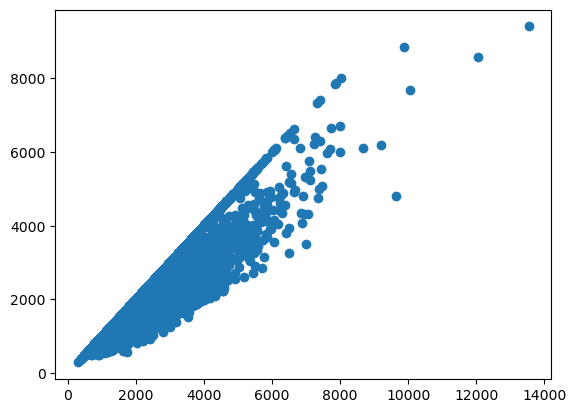

In [9]:
    plt.scatter(df_updated['sqft_living'],df_updated['sqft_above'])

In [10]:
df_without_na = df_updated.dropna()

In [11]:
df_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

In [20]:
x = df_without_na[['sqft_living']]
y = df_without_na['sqft_above']

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(x,y)

LinearRegression()

In [27]:
df_updated.loc[df_updated['sqft_above'].isna()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [28]:
model.predict(df_updated.loc[df_updated['sqft_above'].isna()][['sqft_living']])

array([2958.38864251, 1409.09245928])

In [30]:
df_updated.loc[df_updated['sqft_above'].isna(),'sqft_above'] = model.predict(df_updated.loc[df_updated['sqft_above'].isna()][['sqft_living']])

In [31]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [33]:
x = df_updated.drop(columns = ['price'], axis =1 )
y = df_updated['price']

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test,y_pred)

0.6966832514266085

In [42]:
model.score(x_train,y_train)

0.7004091148535884